# Table of Contents
 <p><div class="lev1"><a href="#Task-1.-Compiling-Ebola-Data"><span class="toc-item-num">Task 1.&nbsp;&nbsp;</span>Compiling Ebola Data</a></div>
 <div class="lev1"><a href="#Task-2.-RNA-Sequences"><span class="toc-item-num">Task 2.&nbsp;&nbsp;</span>RNA Sequences</a></div>
 <div class="lev1"><a href="#Task-3.-Class-War-in-Titanic"><span class="toc-item-num">Task 3.&nbsp;&nbsp;</span>Class War in Titanic</a></div></p>

In [3]:
DATA_FOLDER = 'Data/ebola' # Use the data folder provided in Tutorial 02 - Intro to Pandas.

## Task 1. Compiling Ebola Data

The `DATA_FOLDER/ebola` folder contains summarized reports of Ebola cases from three countries (Guinea, Liberia and Sierra Leone) during the recent outbreak of the disease in West Africa. For each country, there are daily reports that contain various information about the outbreak in several cities in each country.

Use pandas to import these data files into a single `Dataframe`.
Using this `DataFrame`, calculate for *each country*, the *daily average per month* of *new cases* and *deaths*.
Make sure you handle all the different expressions for *new cases* and *deaths* that are used in the reports.

In [4]:
# Write your answer here
import glob
import pandas as pd
import numpy as np
from datetime import datetime
pd.options.mode.chained_assignment = None  # default='warn', Mutes warnings when copying a slice from a DataFrame.

In [ ]:
#IMPORT GUINEA DATA
path = 'Data/ebola/guinea_data'
allFiles = glob.glob(path +  "/*.csv")
guinea = pd.DataFrame()
guinea_list_ = []
for file_ in allFiles:
    df = pd.read_csv(file_)
    guinea_list_.append(df)
guinea = pd.concat(guinea_list_)

#IMPORT LIBERIA DATA
path = 'Data/ebola/liberia_data'
allFiles = glob.glob(path +  "/*.csv")
liberia = pd.DataFrame()
liberia_list_ = []
for file_ in allFiles:
    df = pd.read_csv(file_)
    liberia_list_.append(df)
liberia = pd.concat(liberia_list_)

#IMPORT SIERRA LEONE DATA
path = 'Data/ebola/sl_data'
allFiles = glob.glob(path +  "/*.csv")
sl = pd.DataFrame()
sl_list_ = []
for file_ in allFiles:
    df = pd.read_csv(file_)
    sl_list_.append(df)
sl = pd.concat(sl_list_)

In [ ]:
guinea.head(5)

In [ ]:
## Pick interresting cases
#interest_desc = [des for des in guinea.Description.unique() if  ('new' in des.lower() and ('suspect' in des.lower() or 'probables' in des.lower() or 'confirmed' in des.lower())) ]
#interest_desc = interest_desc[:-1]
#interest_desc

# Pick interresting cases
interest_desc = ['New cases of suspects','New cases of probables','New cases of confirmed','Total deaths of suspects',
                 'Total deaths of probables','Total deaths of confirmed']
interest_desc

In [ ]:
# Select interresting cases from the dataframe
filtered_guinea = guinea[guinea.Description.isin(interest_desc)].copy()
filtered_guinea.head(5)

In [ ]:
filtered_guinea2 = filtered_guinea.copy()
filtered_guinea2.dropna(thresh=5, axis=0)

In [ ]:
not_city = ['Date', 'Description', 'Totals']
cities = ['Beyla', 'Boffa', 'Conakry', 'Coyah', 'Dabola', 'Dalaba',
        'Dinguiraye', 'Dubreka', 'Forecariah', 'Gueckedou',
       'Kerouane', 'Kindia', 'Kissidougou', 'Kouroussa', 'Lola', 'Macenta',
       'Mzerekore', 'Nzerekore', 'Pita', 'Siguiri', 'Telimele',
       'Yomou']

In [ ]:

not_city = ['Date', 'Description', 'Totals']

#fill null values with zeros for cities
filtered_guinea[cities] = filtered_guinea[cities].fillna(0)
filtered_guinea

In [ ]:
filtered_guinea

In [ ]:
#Filter the total  if total = nan => sum of all cities 
not_city = ['Date', 'Description', 'Totals'] 

#replace the total nan values with the corresponding sum of all cities
filtered_guinea.loc[pd.isnull(filtered_guinea['Totals']), 'Totals'] = filtered_guinea.drop(not_city, axis=1).astype(int).sum(axis=1)
filtered_guinea

In [ ]:
# Select not cities collumns
filtered_guinea = filtered_guinea[not_city]
filtered_guinea

In [ ]:
filtered_guinea['Month'] = pd.DatetimeIndex(filtered_guinea['Date']).month
filtered_guinea['Year'] = pd.DatetimeIndex(filtered_guinea['Date']).year
filtered_guinea 

In [ ]:
without_date = filtered_guinea.drop('Date', axis=1)

In [ ]:
(filtered_guinea.set_index(['Description', 'Year', 'Month', 'Date'])['Totals'].unstack('Description'))

In [ ]:
# Only 2014
pd.DatetimeIndex(filtered_guinea['Date']).year.unique()

In [ ]:
################################33

In [ ]:
filtered_guinea = filtered_guinea.fillna(0)

In [ ]:
filtered_guinea.loc[pd.isnull(filtered_guinea['Totals'])]

In [ ]:
[t for t in guinea.Totals if not pd.notnull(t)]

In [ ]:
[des for des in liberia.Variable.unique() if  ('new' in des.lower())]

In [ ]:
[des for des in sl.variable.unique() if ('New' in des) or ('new' in des)]

In [ ]:
sl.variable.unique() 

## Task 2. RNA Sequences

In the `DATA_FOLDER/microbiome` subdirectory, there are 9 spreadsheets of microbiome data that was acquired from high-throughput RNA sequencing procedures, along with a 10<sup>th</sup> file that describes the content of each. 

Use pandas to import the first 9 spreadsheets into a single `DataFrame`.
Then, add the metadata information from the 10<sup>th</sup> spreadsheet as columns in the combined `DataFrame`.
Make sure that the final `DataFrame` has a unique index and all the `NaN` values have been replaced by the tag `unknown`.

In [ ]:
# Write your answer here

## Task 3. Class War in Titanic

Use pandas to import the data file `Data/titanic.xls`. It contains data on all the passengers that travelled on the Titanic.

In [5]:
DATA_FOLDER ='Data'
from IPython.core.display import HTML
HTML(filename=DATA_FOLDER+'/titanic.html')

Name,Labels,Units,Levels,Storage,NAs
pclass,,,3,integer,0
survived,Survived,,,double,0
name,Name,,,character,0
sex,,,2,integer,0
age,Age,Year,,double,263
sibsp,Number of Siblings/Spouses Aboard,,,double,0
parch,Number of Parents/Children Aboard,,,double,0
ticket,Ticket Number,,,character,0
fare,Passenger Fare,British Pound (\243),,double,1
cabin,,,187,integer,0


For each of the following questions state clearly your assumptions and discuss your findings:
1. Describe the *type* and the *value range* of each attribute. Indicate and transform the attributes that can be `Categorical`. 
2. Plot histograms for the *travel class*, *embarkation port*, *sex* and *age* attributes. For the latter one, use *discrete decade intervals*. 
3. Calculate the proportion of passengers by *cabin floor*. Present your results in a *pie chart*.
4. For each *travel class*, calculate the proportion of the passengers that survived. Present your results in *pie charts*.
5. Calculate the proportion of the passengers that survived by *travel class* and *sex*. Present your results in *a single histogram*.
6. Create 2 equally populated *age categories* and calculate survival proportions by *age category*, *travel class* and *sex*. Present your results in a `DataFrame` with unique index.

In [6]:
titanic = pd.read_excel('Data/titanic.xls')
titanic

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


    1. Describe the type and the value range of each attribute. Indicate and transform the attributes that can be Categorical.

In [7]:
# Summary of the dataframe
print(titanic.info())
titanic.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
pclass       1309 non-null int64
survived     1309 non-null int64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null int64
parch        1309 non-null int64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(3), int64(4), object(7)
memory usage: 143.2+ KB
None


,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [8]:
for col in titanic.columns:
    cat = titanic[col].unique()
    print(col, len(cat))
    if len(cat)<10: print(cat)
    

pclass 3
[1 2 3]
survived 2
[1 0]
name 1307
sex 2
['female' 'male']
age 99
sibsp 7
[0 1 2 3 4 5 8]
parch 8
[0 2 1 4 3 5 6 9]
ticket 939
fare 282
cabin 187
embarked 4
['S' 'C' nan 'Q']
boat 29
body 122
home.dest 370


    2.Plot histograms for the travel class, embarkation port, sex and age attributes. For the latter one, use discrete decade intervals.

In [11]:
import matplotlib.pyplot as plt

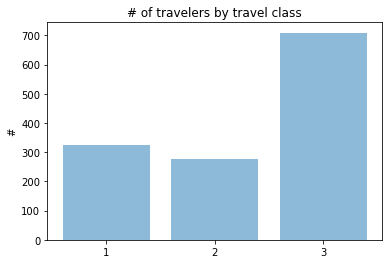

In [14]:
# Travel Class
values = titanic['pclass'].value_counts().sort_index()
classes = values.index

y_pos = np.arange(len(classes))
 
plt.bar(y_pos, values, align='center', alpha=0.5)
plt.xticks(y_pos, classes)
plt.ylabel('#')
plt.title('# of travelers by travel class')
plt.show()

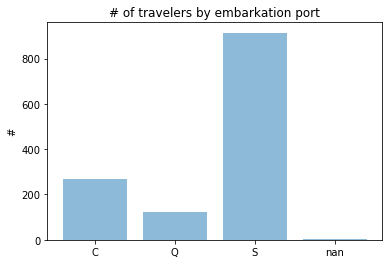

C      270
Q      123
S      914
NaN      2
Name: embarked, dtype: int64

In [15]:
# Embarkation port
values = titanic['embarked'].value_counts(dropna=False).sort_index()
emb_port = values.index
y_pos = np.arange(len(emb_port))
 
plt.bar(y_pos, values, align='center', alpha=0.5)
plt.xticks(y_pos, emb_port)
plt.ylabel('#')
plt.title('# of travelers by embarkation port')
plt.show()

values

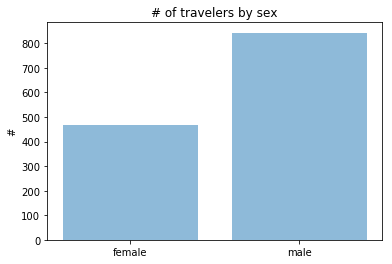

female    466
male      843
Name: sex, dtype: int64

In [16]:
# Sex
values = titanic['sex'].value_counts(dropna=False).sort_index()
sex = values.index

y_pos = np.arange(len(sex))
values = titanic['sex'].value_counts(dropna=False).sort_index()
 
plt.bar(y_pos, values, align='center', alpha=0.5)
plt.xticks(y_pos, sex)
plt.ylabel('#')
plt.title('# of travelers by sex')
plt.show()

values

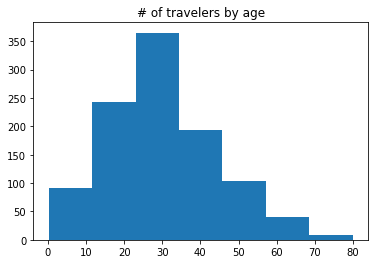

In [17]:
#Age (Using descrrete decade intervals)
ages = titanic['age'].dropna().values
min_age = min(ages)
max_age = max(ages)
plt.hist(ages, bins = int((max_age-min_age)/10))
plt.title('# of travelers by age')
plt.show()

    3.Calculate the proportion of passengers by cabin floor. Present your results in a pie chart.

In [18]:
#find the floor
def which_floor(f):
    if pd.isnull(f): return 'Unknown'
    return ''.join(set(''.join([i for i in f if not i.isdigit() and i != ' '])))

floor = titanic['cabin'].apply(lambda x: which_floor(x))

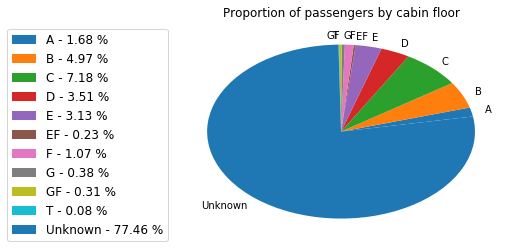

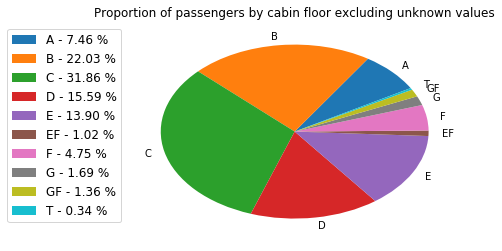

In [20]:
values = floor.value_counts().sort_index()
floor_idx = values.index
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(floor_idx, values*100.0/sum(values))]


patches, _, _ = plt.pie(values, labels = floor_idx, autopct='', startangle=10, radius=1, pctdistance=0.8)
#autopct='%1.1f%%'
plt.legend(patches, labels, loc='best',fontsize=12, bbox_to_anchor=(0, 1))
plt.title('Proportion of passengers by cabin floor')
plt.show()

labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(floor_idx, values*100.0/sum(values[:-1]))]
patches, _, _ = plt.pie(values[:-1], labels = floor_idx[:-1], autopct='', startangle=30, radius=1)
plt.legend(patches, labels, loc='best',fontsize=12, bbox_to_anchor=(0, 1))
plt.title('Proportion of passengers by cabin floor excluding unknown values')
plt.show()

    4.For each travel class, calculate the proportion of the passengers that survived. Present your results in pie charts.

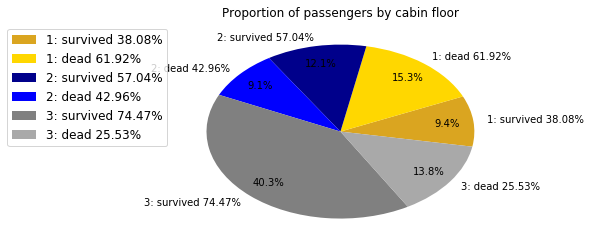

In [21]:
labels = []
values = []
for i in titanic.pclass.unique():
    values.append(list(titanic[titanic['pclass']==i]['survived'].value_counts().sort_index()))
values = [i for cl in values for i in cl]

for i in titanic.pclass.unique():
    p1 = values[2*(i-1)]
    p0 = values[2*(i-1)+1]
    labels.append(str(i)+': survived '+str(round(p1*100/(p0+p1),2))+'%')
    labels.append(str(i)+': dead '+ str(round(p0*100/(p0+p1),2))+'%')

colors = ['goldenrod', 'gold', 'darkblue', 'blue', 'grey', 'darkgrey']

patches, _, _ = plt.pie(values, labels = labels, autopct='%1.1f%%', startangle=-10, radius=1, pctdistance=0.8, 
                       colors = colors)
#autopct='%1.1f%%'
plt.legend(patches, labels, loc='best',fontsize=12, bbox_to_anchor=(0, 1))
plt.title('Proportion of passengers by cabin floor')
plt.show()

    5. Calculate the proportion of the passengers that survived by travel class and sex. Present your results in a single histogram.

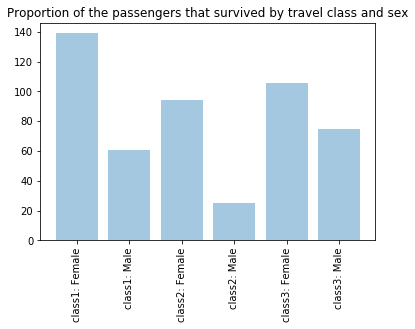

In [22]:
labels = []
values = []
for i in titanic.pclass.unique():
    values.append(list( titanic.loc[(titanic['pclass']== i) & (titanic['survived']==1)]['sex'].value_counts().sort_index()))
    labels.append('class'+str(i)+': Female')
    labels.append('class'+str(i)+': Male')
values = [i for cl in values for i in cl]

y_pos = np.arange(len(values))
plt.bar(y_pos, values, align='center', alpha=0.4)
plt.xticks(y_pos, labels, rotation='vertical')
plt.title('Proportion of the passengers that survived by travel class and sex')
plt.show()

In [ ]:
###########################################################3